# 07 Example - Timed Property Scan

In [4]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

## Setup devices

In [5]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

## Define a measure function

In [6]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
        
    return d

## Experiments

### 1. Timed 1D Scan

In [11]:
# 1D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

# add the flag time=True, so timing data will be added to runinfo at the end of the experiment
expt = ps.Sweep(runinfo, devices, time=True)
expt.run()

sleep(1)

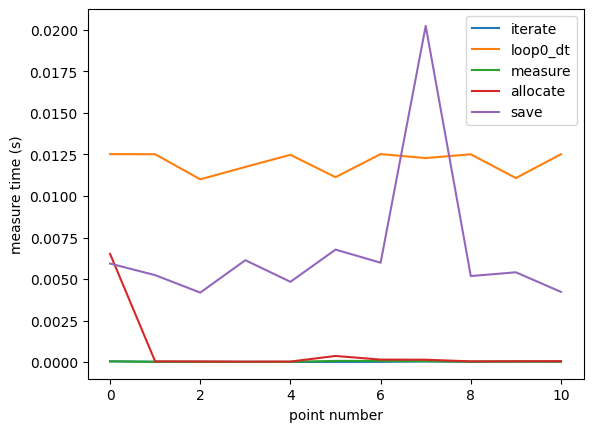

In [12]:
# Collect the time data from expt.runinfo. 
plt.plot(expt.runinfo.dt1)
plt.plot(expt.runinfo.dt2)
plt.plot(expt.runinfo.dt3)
plt.plot(expt.runinfo.dt4)
plt.plot(expt.runinfo.dt5)

plt.legend(['iterate', 'loop0_dt', 'measure', 'allocate', 'save'])


plt.xlabel('point number')
plt.ylabel('measure time (s)')
plt.show()


In [13]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. loop0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

2.011385830965909e-05 s avg. property iteration time
0.012028954245827415 s avg. loop0 wait time
3.181804310191762e-05 s avg. measure time
0.0006765885786576705 s avg. data allocation time
0.0067379041151566935 s avg. data save time


### 2. Timed 2D Scan

In [15]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

# add the flag time=True, so timing data will be added to runinfo at the end of the experiment
expt = ps.Sweep(runinfo, devices, time=True)
expt.run()


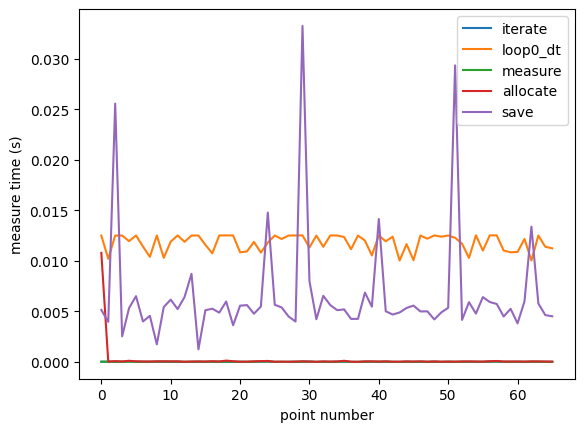

In [16]:
# Time data acquisition

plt.plot(expt.runinfo.dt1.flatten())
plt.plot(expt.runinfo.dt2.flatten())
plt.plot(expt.runinfo.dt3.flatten())
plt.plot(expt.runinfo.dt4.flatten())
plt.plot(expt.runinfo.dt5.flatten())

plt.legend(['iterate', 'loop0_dt', 'measure', 'allocate', 'save'])

plt.xlabel('point number')
plt.ylabel('measure time (s)')

plt.show()



In [17]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. loop0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

1.811619960900509e-05 s avg. property iteration time
0.011810172687877308 s avg. loop0 wait time
2.577449336196437e-05 s avg. measure time
0.00021800489136666963 s avg. data allocation time
0.006616921135873506 s avg. data save time
